# US Craft Beers

In [34]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("data/beers.db")

# ☑️ Introduction to the Craft Beers dataset 

In this assignment we have access to a SQL database containing information about craft beers in the USA.

You can read about how the data was sourced [here](https://www.jeannicholashould.com/python-web-scraping-tutorial-for-craft-beers.html).

Run the following code cell to show all the tables in the `beers.db` database:

In [35]:
query = """
SELECT name 
FROM sqlite_master 
WHERE type='table';
"""
df = pd.read_sql_query(query, conn)
df

,name
0,beers
1,breweries


Referencing these tables and their respective columns will be useful in answering the following questions. Run the following code to show column names and data types within each table:

In [36]:
for table in ['beers','breweries']:
    
    query = f"""
    PRAGMA table_info({table});
    """
    df = pd.read_sql_query(query, conn)
    print(df[['name','type']])
    print('='*40)

         name     type
0         abv     REAL
1         ibu     REAL
2          id  INTEGER
3        name     TEXT
4       style     TEXT
5  brewery_id  INTEGER
6      ounces     REAL
         name     type
0  brewery_id  INTEGER
1        name     TEXT
2        city     TEXT
3       state     TEXT


# ☑️ Queries

**Q1. Let's start by inspecting the database's metadata. To do this, load all the schemas from the `sqlite_master` table. The columns we want are `type`, `name`, `tbl_name`, `rootpage`, and `sql`.**



In [53]:

conn = sqlite3.connect("data/beers.db")  

metadata_query = "SELECT type, name, tbl_name, rootpage, sql FROM sqlite_master;"
metadata_result = pd.read_sql_query(metadata_query, conn)
conn.close()
print(metadata_result)




    type       name   tbl_name  rootpage  \
0  table      beers      beers         2   
1  table  breweries  breweries        40   

                                                 sql  
0  CREATE TABLE "beers" (\n"abv" REAL,\n  "ibu" R...  
1  CREATE TABLE "breweries" (\n"brewery_id" INTEG...  


**Q2. Now that we know more about the structure of the database, let's retrieve some information. To get started, retrieve the first 5 rows of the `beers` table. We want the `abv`, `ibu`, `name`, and `style` columns.**



In [54]:

conn = sqlite3.connect("data/beers.db")  

five_rows_beers_query = "SELECT abv, ibu, name, style FROM beers;"
five_rows_beer_result = pd.read_sql_query(five_rows_beers_query, conn)
conn.close()
five_rows_beer_result


,abv,ibu,name,style
0,0.050,NaN,Pub Beer,American Pale Lager
1,0.066,NaN,Devil's Cup,American Pale Ale (APA)
2,0.071,NaN,Rise of the Phoenix,American IPA
3,0.090,NaN,Sinister,American Double / Imperial IPA
4,0.075,NaN,Sex and Candy,American IPA
...,...,...,...,...
2405,0.067,45.0,Belgorado,Belgian IPA
2406,0.052,NaN,Rail Yard Ale,American Amber / Red Ale
2407,0.055,NaN,B3K Black Lager,Schwarzbier
2408,0.055,40.0,Silverback Pale Ale,American Pale Ale (APA)


**Q3. Similarly, query the first 5 rows of the `breweries` table. We want the `brewery_id`, `name`, `city`, and `state` columns.**




In [55]:


conn = sqlite3.connect("data/beers.db")  

five_rows_brewery_query = "SELECT brewery_id, name, city, state FROM breweries;"
five_rows_brewery_result = pd.read_sql_query(five_rows_brewery_query, conn)
conn.close()
five_rows_brewery_result


,brewery_id,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


**Q4. Query the `beers` table to find out the number of rows. Use an alias so the name of the column returned is `row_count`.**

- Make use of SQL `COUNT(*)` function to calculate total number of rows, and assign the alias `row_count` to the result using the `AS` keyword



In [56]:

conn = sqlite3.connect("data/beers.db")  

beers_total_rows_query = "SELECT COUNT(*) AS row_count FROM beers;"
beers_total_rows_result = pd.read_sql_query(beers_total_rows_query, conn)
conn.close()
beers_total_rows_result


,row_count
0,2410


**Q5. Query the `beers` table to find out how many distinct styles are present. Use an alias so the name of the column returned is `distinct_styles`.**


- Use `DISTINCT()` function to extract unique beer styles and use `COUNT()` function to calculate the number of unique values in `style` column



In [57]:

conn = sqlite3.connect("data/beers.db")  

distinct_styles_query = "SELECT COUNT(DISTINCT(style)) AS distinct_styles FROM beers;"
distinct_styles_result  = pd.read_sql_query(distinct_styles_query, conn)
conn.close()
distinct_styles_result

,distinct_styles
0,99


**Q6. Let's now find out about alcoholic content. Query the `beers` table to find the minimum, average, and maximum alcohol content (`abv`). The column names should be `min`, `avg`, and `max`.**

- Use `MIN()`, `AVG()` and `MAX()` functions to calculate the minimum, average, and maximum alcohol content in `abv` column
- Consider using SQL `AS` keyword to assign the aliases `min`, `avg`, and `max`



In [58]:


conn = sqlite3.connect("data/beers.db")  

alcoholic_content_query = "SELECT MIN(abv) AS min, AVG(abv) AS avg, MAX(abv) as max FROM beers;"
alcoholic_content_result = pd.read_sql_query(alcoholic_content_query, conn)
conn.close()
alcoholic_content_result

,min,avg,max
0,0.001,0.059773,0.128


**Q7. Query the `beers` table to get all the `abv` values.**

We can then use this data to plot the distribution of the `abv`.




In [59]:


conn = sqlite3.connect("data/beers.db")  

abv_distribution_query = "SELECT abv FROM beers;"
abv_distribution_result = pd.read_sql_query(abv_distribution_query, conn)
conn.close()
abv_distribution_result

,abv
0,0.050
1,0.066
2,0.071
3,0.090
4,0.075
...,...
2405,0.067
2406,0.052
2407,0.055
2408,0.055


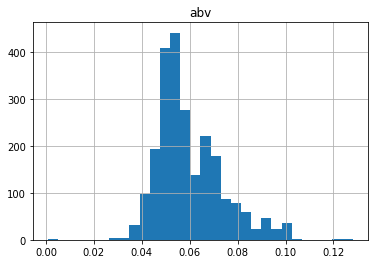

In [44]:
abv_hist = abv_distribution_result.hist(bins=30);

**Q8. Query the distinct types of IPA styles in the `beers` table.**

- Use `DISTINCT()` function to extract unique IPA styles from `style` column and assign the alias `ipa_styles`

- To specify the criteria, you may want to use `LIKE` with the `WHERE` keyword. Extract all IPA styles from `style` column if it has the word `"IPA"` in its name

- Sort the data in alphabetical order, this could be achieved by using `ORDER BY` keyword with `ASC`




In [60]:

conn = sqlite3.connect("data/beers.db")  

ipa_styles_query = """
    SELECT DISTINCT(style) AS ipa_styles 
    FROM beers 
    WHERE style LIKE '%IPA%' 
    ORDER BY ipa_styles ASC;
"""

ipa_styles_result = pd.read_sql_query(ipa_styles_query, conn)
conn.close()
ipa_styles_result


,ipa_styles
0,American Double / Imperial IPA
1,American IPA
2,American White IPA
3,Belgian IPA
4,English India Pale Ale (IPA)


**Q9. The `ibu` is an abbreviation for the International Bitterness Units scale; a measurement of a beer's bitterness. Calculate the average bitterness of lager beers and pale ale beers. Consider a beer style lager if its style contains `"lager"`, and consider a beer style pale ale if its style contains `"IPA"`, `"APA"` or `"Pale Ale"`.**


- Use `AVG()` functions to calculate the average ibu content from the `ibu` column

- To specify the criteria, you may want to use `LIKE` with the `WHERE` keyword, extract all styles from `style` column



In [81]:
conn = sqlite3.connect("data/beers.db")

lager_bitterness_query = """
    SELECT AVG(ibu) AS average_ibu,
           CASE
               WHEN style LIKE '%Lager%' THEN 'Lager'
               WHEN style LIKE '%IPA%' OR style LIKE '%APA%' OR style LIKE '%Pale Ale%' THEN 'Pale Ale'
               ELSE 'Other'
           END AS beer_type
    FROM beers
    WHERE style LIKE '%Lager%' OR style LIKE '%IPA%' OR style LIKE '%APA%' OR style LIKE '%Pale Ale%'
    GROUP BY beer_type;
"""

lager_bitterness_result = pd.read_sql_query(lager_bitterness_query, conn)
conn.close()
lager_bitterness_result

,average_ibu,beer_type
0,22.863636,Lager
1,63.353571,Pale Ale


**Q10. Calculate how many beers there are of each `style` in the `beers` table.** 


- Your result should have two columns: `style` (the style name) and `number` (the number of beers of that style).

- Order the results by the `number` of beers of each style in _descending_ order. 

- Limit your result to the first `10` styles.

In [62]:


conn = sqlite3.connect("data/beers.db")


style_count_query = """
    SELECT style, COUNT(style) AS number
    FROM beers
    GROUP BY style
    ORDER BY number DESC
    LIMIT 10;
"""


style_count_result = pd.read_sql_query(style_count_query, conn)
conn.close()
style_count_result


,style,number
0,American IPA,424
1,American Pale Ale (APA),245
2,American Amber / Red Ale,133
3,American Blonde Ale,108
4,American Double / Imperial IPA,105
5,American Pale Wheat Ale,97
6,American Brown Ale,70
7,American Porter,68
8,Saison / Farmhouse Ale,52
9,Witbier,51


**Q11. Query the `beers` and `breweries` tables to list all the breweries and beers that can be found in San Francisco.**

- An `INNER JOIN` can be used to merge the `beers` and `breweries` tables based on the common field `brewery_id`: `beers.brewery_id = breweries.brewery_id`

- Your result should contain two columns: `brewery` and `beer`: Use `AS` keyword to assign the alias `brewery` to `breweries.name` column and alias `beer` to `beers.name` column

- To specify the criteria, use the `WHERE` keyword, consider filtering by `breweries.city = 'San Francisco'`

- The result should be ordered alphabetically by brewery name then beer name, this could be achieved by using `ORDER BY` keyword with `ASC`


In [49]:

conn = sqlite3.connect("data/beers.db")

beers_and_brewery_query = """
SELECT breweries.name AS brewery, beers.name AS beer
FROM breweries
INNER JOIN beers ON breweries.brewery_id = beers.brewery_id
WHERE breweries.city = 'San Francisco'
ORDER BY breweries.name ASC, beers.name ASC;
"""

beers_and_brewery_result = pd.read_sql_query(beers_and_brewery_query, conn)
conn.close()
beers_and_brewery_result



,brewery,beer
0,21st Amendment Brewery,21st Amendment IPA (2006)
1,21st Amendment Brewery,21st Amendment Watermelon Wheat Beer (2006)
2,21st Amendment Brewery,Back in Black
3,21st Amendment Brewery,Bitter American
4,21st Amendment Brewery,Bitter American (2011)
5,21st Amendment Brewery,Brew Free! or Die IPA
6,21st Amendment Brewery,Brew Free! or Die IPA (2008)
7,21st Amendment Brewery,Brew Free! or Die IPA (2009)
8,21st Amendment Brewery,Fireside Chat
9,21st Amendment Brewery,Fireside Chat (2010)


**Q12. Query the `beers` and `breweries` tables to find the largest breweries by the number of beers produced.**

- Your result should have two columns, `name` and `number of beers`, and should be ordered from largest to smallest.

- If `number of beers` is the same, it should be ordered alphabetically.

- Limit your result to the top `10` breweries.

_Note: if a column name has spaces, you can wrap it in backticks(\` \`), quotes(" "), or square brackets(\[ \])._

_E.g. `SELECT [long column name] FROM table`_

_**Hint**:  some breweries have the same name, hence you cannot rely on unique names. ID numbers are often used unique identifiers for this reason._



In [51]:

conn = sqlite3.connect("data/beers.db")
largest_breweries_query = """
SELECT breweries.name AS name, COUNT(*) AS "number of beers"
FROM beers
INNER JOIN breweries
ON beers.brewery_id = breweries.brewery_id
GROUP BY breweries.brewery_id, breweries.name 
ORDER BY "number of beers" DESC, name ASC
LIMIT 10;
"""
largest_breweries_result = pd.read_sql_query(largest_breweries_query, conn)
largest_breweries_result

,name,number of beers
0,Brewery Vivant,62
1,Sun King Brewing Company,38
2,Oskar Blues Brewery,33
3,Cigar City Brewing Company,25
4,Sixpoint Craft Ales,24
5,Hopworks Urban Brewery,23
6,Stevens Point Brewery,22
7,21st Amendment Brewery,20
8,Great Crescent Brewery,20
9,Bonfire Brewing Company,19


**Q13. Query the `breweries` and `beers` tables to identify the top 10 US states with regard to the number of _breweries_.**


- Your result should have three columns: `state`, `breweries` (the number of breweries), and `beers` (the number of `beers`).

- Make sure you order your result by number of breweries to get the top 10 - if there is a draw order alphabetically by state



In [52]:

conn = sqlite3.connect("data/beers.db")
top_10_states_query = """
SELECT
    brew.state AS state
    , COUNT(DISTINCT(brew.brewery_id)) AS breweries
    , COUNT(*) AS beers
FROM beers
JOIN breweries AS brew
ON beers.brewery_id = brew.brewery_id
GROUP BY state
ORDER BY breweries DESC, state ASC
LIMIT 10
"""
top_10_states_result = pd.read_sql_query(top_10_states_query, conn)
top_10_states_result


,state,breweries,beers
0,CO,47,265
1,CA,39,183
2,MI,32,162
3,OR,29,125
4,TX,28,130
5,PA,25,100
6,MA,23,82
7,WA,23,68
8,IN,22,139
9,WI,20,87


In this project, I looked at the US Crafts Beers dataset and practiced some of my SQL queries by answering 10 questions which created comparison tables of beers, breweries and  which state in America they are from. I also created a histogram using a SQL query which displayed the distribution of beers around the US. This task was quite good as it helped me to practice the common SQL queries and SQL functions that I would come across when analysing data in a real world application perspective. The 13 project questions gave a great overview of how to do simple data analysis of a dataset using SQL. Overall this project went well and I did not encounter any problems with the questions. I look forward to continuing to build upon my SQL skills using Python in future projects.